In [ ]:
# import the pandas library
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
customer_feedback = pd.read_excel('customerfeedback.xlsx') 
customer_feedback.head()

,Customer ID,Tenure,Geography ID,Completed tutorial,Subscription ID,Role,Company ID,Rating,Theme,Original Score
0,10000000,7.0,2,yes,2,1,2,High,speed,9
1,10000001,9.0,1,yes,2,1,1,High,features,10
2,10000002,7.0,1,yes,1,1,2,High,design,9
3,10000003,24.0,4,yes,2,1,2,High,price,10
4,10000004,6.0,4,no,2,1,1,High,governance,9


In [17]:
customer_feedback.isna().sum()

Customer ID             0
Tenure                812
Geography ID            0
Completed tutorial      0
Subscription ID         0
Role                    0
Company ID              0
Rating                  0
Theme                   0
Original Score          0
dtype: int64

In [19]:
median_tenure = customer_feedback['Tenure'].median()
customer_feedback['Tenure'].fillna(median_tenure, inplace=True)
customer_feedback.isna().sum()

Customer ID           0
Tenure                0
Geography ID          0
Completed tutorial    0
Subscription ID       0
Role                  0
Company ID            0
Rating                0
Theme                 0
Original Score        0
dtype: int64

In [25]:
custome_id = customer_feedback['Customer ID'].apply(type).unique()
tenure = customer_feedback['Tenure'].apply(type).unique()
geography = customer_feedback['Geography ID'].apply(type).unique()
completed_tutorial = customer_feedback['Completed tutorial'].apply(type).unique()
subscription_id = customer_feedback['Subscription ID'].apply(type).unique()
role = customer_feedback['Role'].apply(type).unique()
company_id = customer_feedback['Company ID'].apply(type).unique()
rating = customer_feedback['Rating'].apply(type).unique()
theme = customer_feedback['Theme'].apply(type).unique()
original_score   = customer_feedback['Original Score'].apply(type).unique()
print(custome_id, tenure, geography, completed_tutorial, subscription_id, role, company_id, rating, theme, original_score, sep='\n')


[<class 'int'>]
[<class 'float'>]
[<class 'int'>]
[<class 'str'>]
[<class 'int'>]
[<class 'int'>]
[<class 'int'>]
[<class 'str'>]
[<class 'str'>]
[<class 'int'>]


In [27]:
customer_feedback['Completed tutorial'] = customer_feedback['Completed tutorial'].map({
    'Yes': True,
    'No': False
})

customer_feedback['Completed tutorial'] = customer_feedback['Completed tutorial'].astype(bool)
print(customer_feedback['Completed tutorial'].unique())
print(customer_feedback.dtypes)




[ True]
Customer ID             int64
Tenure                float64
Geography ID            int64
Completed tutorial       bool
Subscription ID         int64
Role                    int64
Company ID              int64
Rating                 object
Theme                  object
Original Score          int64
dtype: object


In [28]:
customer_feedback.describe()

,Customer ID,Tenure,Geography ID,Subscription ID,Role,Company ID,Original Score
count,4.521800e+04,45218.000000,45218.00000,45218.000000,45218.000000,45218.000000,45218.000000
mean,1.002261e+07,16.698063,1.72051,1.839776,1.776328,1.832323,7.419457
std,1.305346e+04,11.597370,0.86660,0.366818,0.549711,0.608247,2.137732
min,1.000000e+07,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000
25%,1.001130e+07,8.000000,1.00000,2.000000,1.000000,1.000000,6.000000
50%,1.002261e+07,16.000000,1.00000,2.000000,2.000000,2.000000,8.000000
75%,1.003391e+07,24.000000,2.00000,2.000000,2.000000,2.000000,9.000000
max,1.004522e+07,60.000000,4.00000,2.000000,3.000000,3.000000,10.000000


In [33]:
print(customer_feedback['Role'].value_counts())
print(customer_feedback['Theme'].value_counts())
print(customer_feedback['Completed tutorial'].value_counts())
print(customer_feedback['Rating'].value_counts())


Role
2    29292
1    13020
3     2906
Name: count, dtype: int64
Theme
price          9734
speed          9458
features       7599
reliability    5171
services       4154
security       2267
support        1579
design         1487
navigation     1303
other          1240
usability       938
governance      288
Name: count, dtype: int64
Completed tutorial
True    45218
Name: count, dtype: int64
Rating
High    39925
Low      5293
Name: count, dtype: int64


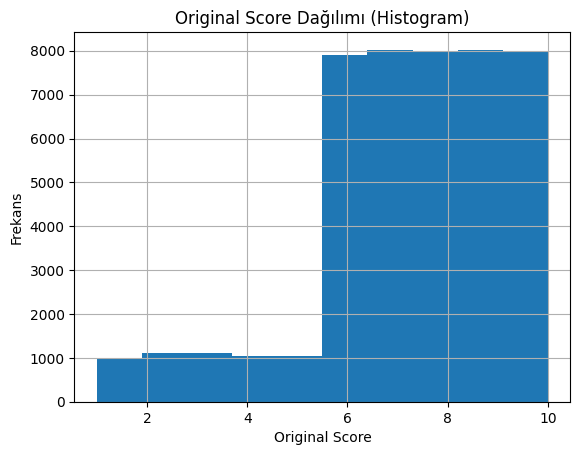

In [36]:
customer_feedback['Original Score'].hist(bins=10)
plt.title("Original Score Dağılımı (Histogram)")
plt.xlabel("Original Score")
plt.ylabel("Frekans")
plt.show()



In [39]:
avg_score_by_role = customer_feedback.groupby('Role')['Original Score'].mean()
print("Role bazında ortalama Original Score:")
print(avg_score_by_role)
print("---------")


Role bazında ortalama Original Score:
Role
1    7.803687
2    7.259627
3    7.309016
Name: Original Score, dtype: float64
---------


Korelasyon Matrisi:
                  Tenure  Geography ID  Company ID  Original Score
Tenure          1.000000      0.038601   -0.014554       -0.076272
Geography ID    0.038601      1.000000    0.036288       -0.013214
Company ID     -0.014554      0.036288    1.000000        0.037186
Original Score -0.076272     -0.013214    0.037186        1.000000


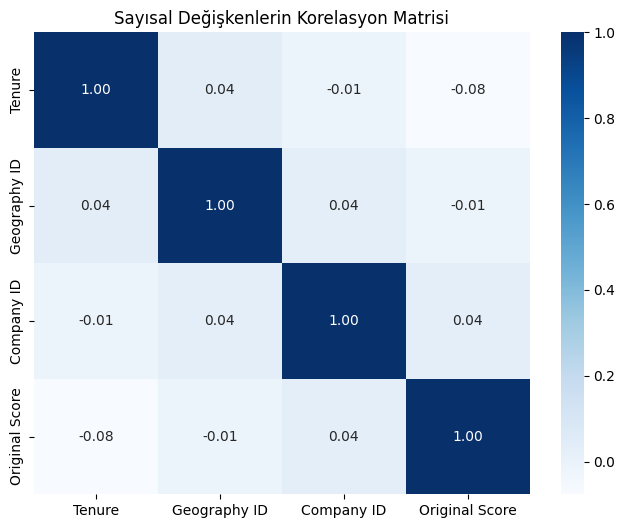

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Tenure', 'Geography ID', 'Company ID', 'Original Score']
corr_matrix = customer_feedback[numeric_cols].corr()

print("Korelasyon Matrisi:")
print(corr_matrix)


plt.figure(figsize=(8, 6))  # Isı haritasının boyutu
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Sayısal Değişkenlerin Korelasyon Matrisi")
plt.show()


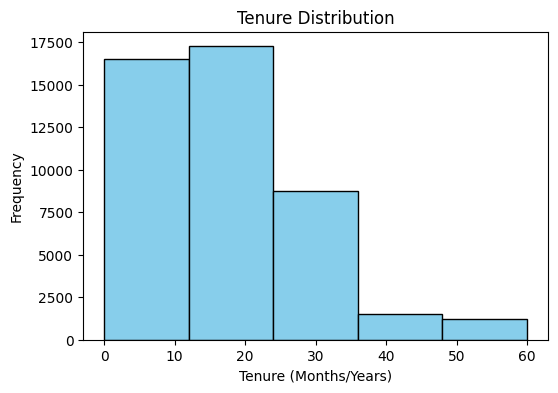

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(customer_feedback['Tenure'], bins=5, color='skyblue', edgecolor='black')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Months/Years)')
plt.ylabel('Frequency')
plt.show()


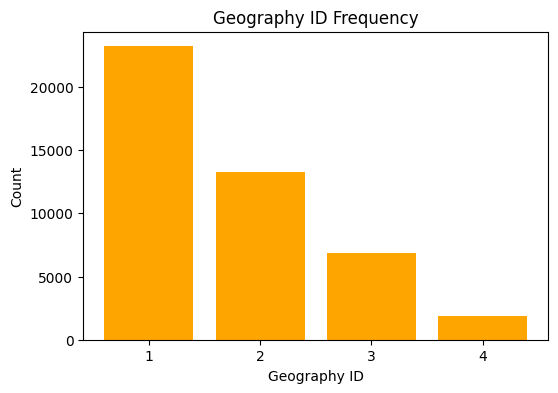

In [48]:
import matplotlib.pyplot as plt

# Frekans tablosu
geo_counts = customer_feedback['Geography ID'].value_counts()  # Örneğin 1: 2 adet, 2: 2 adet, 4: 2 adet...

plt.figure(figsize=(6,4))
plt.bar(geo_counts.index.astype(str), geo_counts.values, color='orange')
plt.title('Geography ID Frequency')
plt.xlabel('Geography ID')
plt.ylabel('Count')
plt.show()


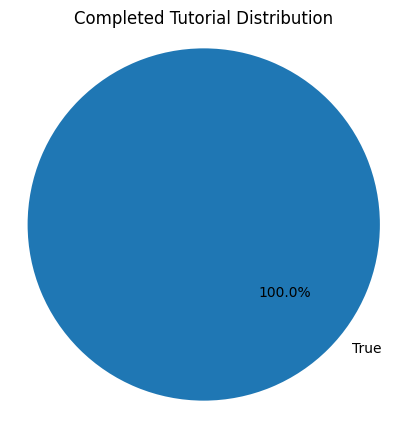

In [49]:
import matplotlib.pyplot as plt

tutorial_counts = customer_feedback['Completed tutorial'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(tutorial_counts.values, 
        labels=tutorial_counts.index, 
        autopct='%1.1f%%', 
        startangle=140)
plt.title('Completed Tutorial Distribution')
plt.axis('equal')  # Dairenin eşit görünmesi için
plt.show()


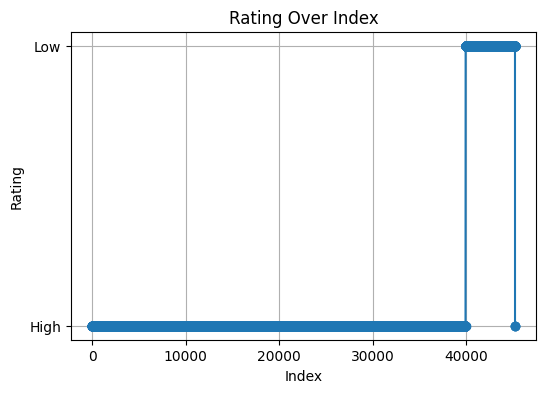

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(customer_feedback.index, customer_feedback['Rating'], marker='o', linestyle='-')
plt.title('Rating Over Index')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

